# Objectives: 
1. Common data problems 
 - 1.1 Summing strings and concatenating numbers
 - 1.2 Data range constraints
 - 1.3 Find and drop duplicates
2. Text and categorical data problems
 - 2.1 Membership constraints
 - 2.2 Categorical data problems 
3.  Advanced data problems
 - 3.1 Uniform 
 - 3.2 Cross validation: data integrity
 - 3.3 Completeness

## 1. Common data problems

### 1.1 Summing strings and concatenating numbers

In [ ]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes')

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']])
print(ride_sharing['duration_time'].mean())

### 1.2 Data range constraints

**The size constraints**

In [ ]:
# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27,'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())

In [ ]:
Output:
    
count     25760
unique        2
top          27
freq      13274
Name: tire_sizes, dtype: int64

**Data constraints**

In [ ]:
# Convert ride_date to date
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date']).dt.date

# Save today's date
today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())

In [ ]:
Output:
    
2023-01-07

### 1.3 Find and drop duplicates

In [ ]:
# Find duplicates
duplicates = ride_sharing.duplicated(subset='ride_id', keep=False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values(by = 'ride_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration','user_birth_year']])

In [ ]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()

# Find duplicated values again
# keep{‘first’, ‘last’, False}, default ‘first’ to determines which duplicates (if any) to mark.
# first : Mark duplicates as True except for the first occurrence.
# last : Mark duplicates as True except for the last occurrence.
#False : Mark all duplicates as True.
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

## 2. Text and categorical data problems

### 2.1 Membership constraints

In [ ]:
# Print categories DataFrame
print(categories)

# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

In [ ]:
Output:
    
      cleanliness           safety          satisfaction
0           Clean          Neutral        Very satisfied
1         Average        Very safe               Neutral
2  Somewhat clean    Somewhat safe    Somewhat satisfied
3  Somewhat dirty      Very unsafe  Somewhat unsatisfied
4           Dirty  Somewhat unsafe      Very unsatisfied
Cleanliness:  ['Clean', 'Average', 'Unacceptable', 'Somewhat clean', 'Somewhat dirty', 'Dirty']
Categories (6, object): ['Average', 'Clean', 'Dirty', 'Somewhat clean', 'Somewhat dirty', 'Unacceptable'] 

Safety:  ['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe']
Categories (5, object): ['Neutral', 'Somewhat safe', 'Somewhat unsafe', 'Very safe', 'Very unsafe'] 

Satisfaction:  ['Very satisfied', 'Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied', 'Very unsatisfied']
Categories (5, object): ['Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied', 'Very satisfied', 'Very unsatisfied'] 

In [ ]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

In [ ]:
Output:
    
      id        day           airline  destination  dest_region dest_size boarding_area   dept_time  wait_min   cleanliness         safety        satisfaction
4    2992  Wednesday          AMERICAN        MIAMI      East US       Hub   Gates 50-59  2018-12-31     559.0  Unacceptable      Very safe  Somewhat satisfied
18   2913     Friday  TURKISH AIRLINES     ISTANBUL  Middle East       Hub  Gates 91-102  2018-12-31     225.0  Unacceptable      Very safe  Somewhat satisfied
100  2321  Wednesday         SOUTHWEST  LOS ANGELES      West US       Hub   Gates 20-39  2018-12-31     130.0  Unacceptable  Somewhat safe  Somewhat satisfied

In [ ]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

# Print rows with consistent categories only
print(airlines[~cat_clean_rows])

In [ ]:
Output:

      id        day           airline  destination  dest_region dest_size boarding_area   dept_time  wait_min   cleanliness         safety        satisfaction
4    2992  Wednesday          AMERICAN        MIAMI      East US       Hub   Gates 50-59  2018-12-31     559.0  Unacceptable      Very safe  Somewhat satisfied
18   2913     Friday  TURKISH AIRLINES     ISTANBUL  Middle East       Hub  Gates 91-102  2018-12-31     225.0  Unacceptable      Very safe  Somewhat satisfied
100  2321  Wednesday         SOUTHWEST  LOS ANGELES      West US       Hub   Gates 20-39  2018-12-31     130.0  Unacceptable  Somewhat safe  Somewhat satisfied
       
       
        id       day        airline        destination    dest_region dest_size boarding_area   dept_time  wait_min     cleanliness         safety        satisfaction
0     1351   Tuesday    UNITED INTL             KANSAI           Asia       Hub  Gates 91-102  2018-12-31     115.0           Clean        Neutral      Very satisfied
1      373    Friday         ALASKA  SAN JOSE DEL CABO  Canada/Mexico     Small   Gates 50-59  2018-12-31     135.0           Clean      Very safe      Very satisfied
2     2820  Thursday          DELTA        LOS ANGELES        West US       Hub   Gates 40-48  2018-12-31      70.0         Average  Somewhat safe             Neutral
3     1157   Tuesday      SOUTHWEST        LOS ANGELES        West US       Hub   Gates 20-39  2018-12-31     190.0           Clean      Very safe  Somewhat satisfied
5      634  Thursday         ALASKA             NEWARK        East US       Hub   Gates 50-59  2018-12-31     140.0  Somewhat clean      Very safe      Very satisfied
...    ...       ...            ...                ...            ...       ...           ...         ...       ...             ...            ...                 ...
2804  1475   Tuesday         ALASKA       NEW YORK-JFK        East US       Hub   Gates 50-59  2018-12-31     280.0  Somewhat clean        Neutral  Somewhat satisfied
2805  2222  Thursday      SOUTHWEST            PHOENIX        West US       Hub   Gates 20-39  2018-12-31     165.0           Clean      Very safe      Very satisfied
2806  2684    Friday         UNITED            ORLANDO        East US       Hub   Gates 70-90  2018-12-31      92.0           Clean      Very safe      Very satisfied
2807  2549   Tuesday        JETBLUE         LONG BEACH        West US     Small    Gates 1-12  2018-12-31      95.0           Clean  Somewhat safe      Very satisfied
2808  2162  Saturday  CHINA EASTERN            QINGDAO           Asia     Large    Gates 1-12  2018-12-31     220.0           Clean      Very safe  Somewhat satisfied

[2474 rows x 12 columns]

### 2.2 Categorical data problems

In [ ]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower() 
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip(' ')

# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

In [ ]:
Output:
    
['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']

['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']

['Hub' 'Small' 'Medium' 'Large']

**Remapping categories**

In [ ]:
# Create ranges for categories
# np.inf means largerrrrr 
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

**Removing titles and taking names**

In [ ]:
# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace('Mr.',"")

# Replace "Miss" with empty string ""
airlines['full_name']=airlines['full_name'].str.replace('Miss',"")

# Replace "Ms." with empty string ""
airlines['full_name']=airlines['full_name'].str.replace('Ms.',"")

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

In [ ]:
# Store length of each row in survey_response column
resp_length = airlines['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])

In [ ]:
Output:

18    The airport personnell forgot to alert us of d...
19    The food in the airport was really really expe...
20    One of the other travelers was really loud and...
21    I don't remember answering the survey with the...
22    The airport personnel kept ignoring my request...
23    The chair I sat in was extremely uncomfortable...
24    I wish you were more like other airports, the ...
25    I was really unsatisfied with the wait times b...
27    The flight was okay, but I didn't really like ...
28    We were really slowed down by security measure...
29    There was a spill on the aisle next to the bat...
30    I felt very unsatisfied by how long the flight...
Name: survey_response, dtype: object

## 3.  Advanced data problems

### 3.1 Uniform

**Uniform date**

In [ ]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro' #row

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu,'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

In [ ]:
# Print the header of account_opend
print(banking['account_opened'].head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])

### 3.2 Cross validation: data integrity

In [ ]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[['fund_A','fund_B','fund_C','fund_D']].sum(axis=1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

### 3.3 Completeness

In [ ]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

# Sort banking by age and visualize
banking_sorted = banking.sort_values(by='age')
msno.matrix(banking_sorted)
plt.show()

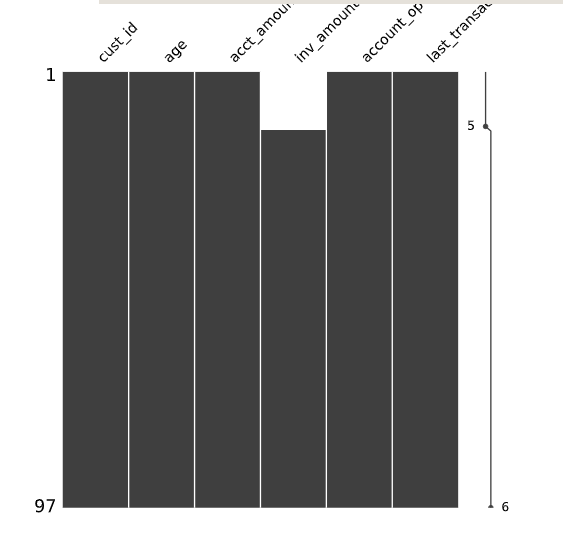